In [1]:
pip install stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 1.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.8     |
|    ep_rew_mean      | -131     |
|    exploration_rate | 0.984    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6170     |
|    time_elapsed     | 0        |
|    total_timesteps  | 335      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22     |
|    n_updates        | 58       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.8     |
|    ep_rew_mean      | -141     |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5671     |
|    time_elapsed     | 0        |
|    total_timesteps  | 646      |
| train/              |        

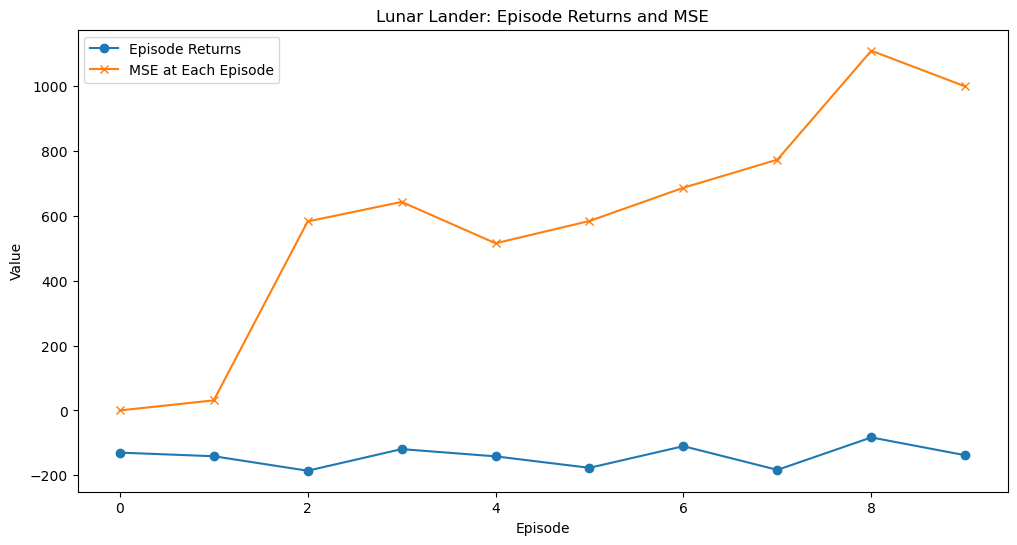

In [14]:
import gymnasium as gym
from stable_baselines3 import DQN
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Set up the Lunar Lander environment
env = gym.make("LunarLander-v3")

# Step 2: Define the DQN model with an MLP policy
model = DQN("MlpPolicy", env, verbose=1)

# Step 3: Train the model for 200,000 timesteps
model.learn(total_timesteps=200_000)

# Step 4: Test the trained model and log returns
test_episodes = 10
returns = []
mse_values = []

for episode in range(test_episodes):
    obs, _ = env.reset()  # Unpack the tuple to get only `obs`
    done = False
    total_reward = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)  # Handle the new return format
        total_reward += reward
        # Check if the episode is finished due to truncation
        done = done or truncated
    returns.append(total_reward)

    # Calculate the mean return up to this episode
    mean_return = np.mean(returns)

    # Calculate the MSE up to this episode
    mse = np.mean((np.array(returns) - mean_return) ** 2)
    mse_values.append(mse)

# Step 5: Plot the returns and MSE
plt.figure(figsize=(12, 6))

# Plot episode returns
plt.plot(returns, label="Episode Returns", marker='o')

# Plot MSE at each episode
plt.plot(mse_values, label="MSE at Each Episode", marker='x')

# Labels and title
plt.xlabel("Episode")
plt.ylabel("Value")
plt.title("Lunar Lander: Episode Returns and MSE")
plt.legend()

# Show the plot
plt.show()
